# Erste Datenanalysen und Visualisierungen mit pandas und seaborn

pandas bietet zahlreiche Möglichkeiten zur Analyse tabellarischer Daten. In Kombination mit den Methoden des [Python-Datentyps String](https://docs.python.org/3/library/stdtypes.html#string-methods), und den Möglichkeiten zur [Visualisierung mit pandas](https://pandas.pydata.org/docs/user_guide/visualization.html) und [seaborn](https://seaborn.pydata.org/tutorial.html), lassen sich bereits umfangreiche Datenanalysen durchführen.

In dieser Übung wollen wir uns ein paar Grundlagen dazu anschauen.

In [1]:
# pandas importieren
import pandas as pd
# seaborn importieren
import seaborn as sns
# matplotlib importieren
import matplotlib.pyplot as plt

# Import und Initialisierung von bia-bob
from bia_bob import bob
# API Key wird aus condas Umgebungsvariable gelesen
bob.initialize(endpoint='blablador', model='alias-fast')

Laden des vorbereiteten Datensatzes ohne Fehlwerte.

In [2]:
df = pd.read_csv('../data/news_category_data_prep.csv', sep='|', parse_dates=[5])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               5061 non-null   object        
 1   headline           5061 non-null   object        
 2   category           5061 non-null   object        
 3   short_description  5061 non-null   object        
 4   authors            5061 non-null   object        
 5   date               5061 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 237.4+ KB


## Extraktion zusätzlicher Informationen

Aus den bereits vorhandenen Spalten lassen sich weitere Informationen extrahieren, die für die Datenanalyse nützlich sind. Diese können dann in neuen Spalten im DataFrame gespeichert werden. Neue Spalten können mit dem Operator `[]` angelegt werden, wobei ein noch nicht existentes Label angegeben und ein Wert zugeordnet wird.
Z.b. 
* `df[new_col] = value`, oder
* `df[new_col] = df[old_col].some_computation`.

### Temporäre Informationen

Aus dem vorhandenen Zeitstempel in der Spalte `date` lassen sich einzelne Bestandteile extrahieren. In diesem Fall wollen wir das Jahr eines Beitrags in einer separaten Spalte speichern. Hierbei hilft uns der Datetime-Typ von pandas. Siehe dazu auch User Guide [Time series / date functionalities](https://pandas.pydata.org/docs/user_guide/timeseries.html).

In [4]:
df['year'] = df['date'].dt.year

In [5]:
df.head()

link  \
0  https://www.huffpost.com/entry/lindsey-graham-...   
1  https://www.huffpost.com/entry/tweets-cats-wat...   
2  https://www.huffpost.com/entry/ken-jennings-ap...   
3  https://www.huffpost.com/entry/biden-coronavir...   
4  https://www.huffpost.com/entry/trick-to-keepin...   

                                            headline       category  \
0  Lindsey Graham Calls For Stand-Alone Vote On $...       POLITICS   
1  24 Tweets About Cats Who Want To Watch The Wor...         COMEDY   
2  Ken Jennings Apologizes For 'Unartful And Inse...  ENTERTAINMENT   
3  Biden To Host Inauguration Eve Memorial To Liv...       POLITICS   
4  The Simple, Science-Backed Trick To Keeping Yo...       WELLNESS   

                                   short_description            authors  \
0  The Republican senator broke with Senate Major...      Hayley Miller   
1                      We are all cats as 2020 ends.      Elyse Wanshel   
2  The "Jeopardy" champion shared a series of ref...     Jenna Amatulli   
3  A ceremony around the Lincoln Memorial to reme...       Sara Boboltz   
4  A new study may have cracked the code to what ...  Catherine Pearson   

        date  year  
0 2020-12-31  2020  
1 2020-12-31  2020  
2 2020-12-31  2020  
3 2020-12-31  2020  
4 2020-12-31  2020

### String-basierte Informationen

Eine weitere Möglichkeit ist, die Anzahl der Wörter in der Spalte `short_description` zu zählen. Dieser Wert soll für die weitere Analyse in einer neuen Spalte `word_count_descr` gespeichert werden.

Nutze dazu den KI-Assistenten.

In [ ]:
%%bob


## Erste Analysen

Mit diesen zusätzlich extrahierten Informationen können nun z.b. verschiedene Verteilungen berechnet und auch visualisiert werden. Dies sind z.B.
* Die durchschnittliche / maximale / minimale Anzahl von Wörtern in `short_description` bzw `word_count_descr`
* Die Anzahl der Beiträge pro Jahr im Allgemeinen
* Die Anzahl der jeweiligen Kategorien über die Jahre
* Die AutorInnen mit den meisten Beiträgen je Kategorie
* Die Entwicklung der Anzahl der Beiträge bestimmmter AutorInnen
* usw...

Am Beispiel "Anzahl von Wörter" können wir z.b. mit [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) den Mittelwert aller Werte einer Spalte berechnen.

In [6]:
# df['word_count_descr'] ...

Für das Beispiel "Anzahl der Beiträge pro Jahr" können wir mit [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) die verschiedenen Werte in der Spalte `year` zählen.

In [7]:
yearly_counts = df['year'].value_counts()
print(yearly_counts)

year
2020    1922
2021    1881
2022    1258
Name: count, dtype: int64


Mit pandas kann das Ergebnis auch direkt visualisiert werden, z.B. als Balkendiagramm. Hierzu bieten sowohl Series als DataFrame die Methode [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

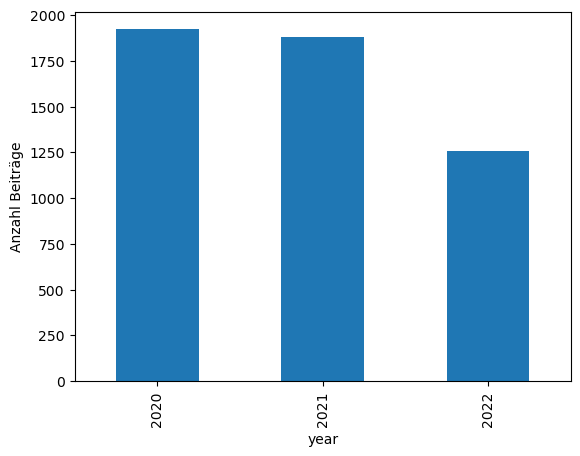

In [8]:
yearly_counts.plot(kind='bar', ylabel='Anzahl Beiträge')
plt.show()

Für komplexere Analysen können wir unseren KI-Assistenten bemühen - hier für die "Entwicklung der Verteilung der Kategorien über die Jahre"

In [ ]:
%%bob
Gib mir Code, um aus einem DataFrame df mit {df.columns} und {df.index} die Verteilung der Kategorien über die verschiedenen Jahre auszugeben.
Der Code soll ein Einzeiler sein.
Visualisiere das Ergebnis in passender Form, nutze seaborn

In [9]:
# Nachfolgende Ausgaben von biabob sind für bessere Übersicht bereits gekürzt und überarbeitet

# 1. Nutze groupby, um die verschiedenen Kategorien je Jahr zu gruppieren und zu zählen
category_yearly_counts = df.groupby(['year', 'category']).size().unstack(fill_value=0).reset_index().set_index('year')

In [10]:
# 2. Ausgabe der gezählten Kategorien
category_yearly_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2020 to 2022
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   BLACK VOICES    3 non-null      int64
 1   BUSINESS        3 non-null      int64
 2   COMEDY          3 non-null      int64
 3   CRIME           3 non-null      int64
 4   CULTURE & ARTS  3 non-null      int64
 5   EDUCATION       3 non-null      int64
 6   ENTERTAINMENT   3 non-null      int64
 7   ENVIRONMENT     3 non-null      int64
 8   FOOD & DRINK    3 non-null      int64
 9   HOME & LIVING   3 non-null      int64
 10  IMPACT          3 non-null      int64
 11  LATINO VOICES   3 non-null      int64
 12  MEDIA           3 non-null      int64
 13  MONEY           3 non-null      int64
 14  PARENTING       3 non-null      int64
 15  POLITICS        3 non-null      int64
 16  QUEER VOICES    3 non-null      int64
 17  RELIGION        3 non-null      int64
 18  SCIENCE         3 non-null      i

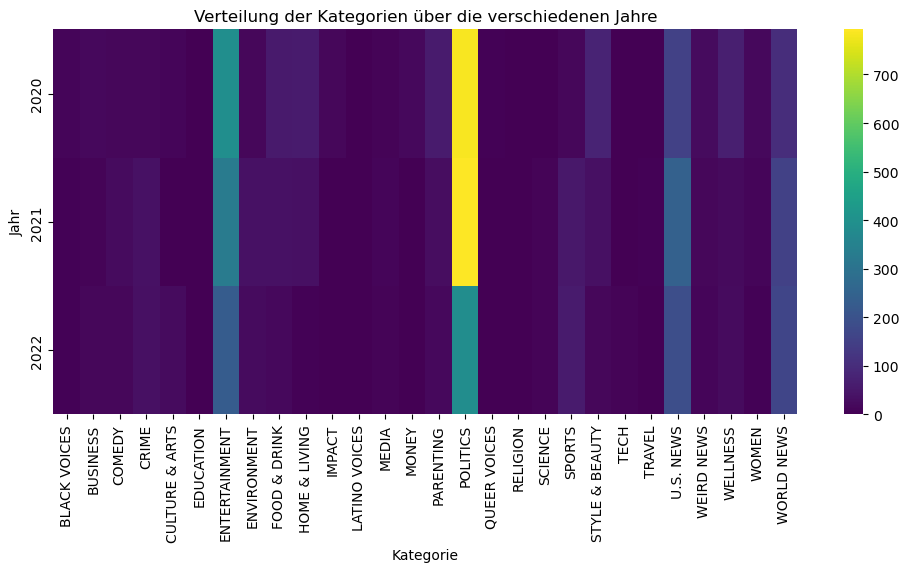

In [11]:
# 3. Visualisierung mit seaborn als Heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(category_yearly_counts, cmap='viridis', cbar=True)
plt.title('Verteilung der Kategorien über die verschiedenen Jahre')
plt.xlabel('Kategorie')
plt.ylabel('Jahr')
plt.xticks(rotation=90)
plt.show()

### Übung
Du bist dran - nutze den KI-Assistenten für deine eigene Analysefrage

In [ ]:
%%bob
